## Chapter 6 CNN 프로그래밍

### [6-1] 필기 숫자 인식

#### [6-1-1] LeNet-5 모델 설계

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

ERROR! Session/line number was not unique in database. History logging moved to new session 240


In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [10]:
def make_graph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend(['train', 'validation'], loc='best')
    plt.grid()
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend(['train', 'validation'], loc='best')
    plt.grid()
    plt.show()

In [3]:
# dataset load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# reshape
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

# 255
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

# one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# LeNet-5 모델 설계

LeNet = Sequential()
# building block1
LeNet.add(Conv2D(filters=6, kernel_size=5, padding="same", activation='relu', strides=1, input_shape=(28, 28, 1)))
LeNet.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# building block2
LeNet.add(Conv2D(filters=16, kernel_size=5, padding="same", activation='relu', strides=1))
LeNet.add(MaxPooling2D(pool_size=(2, 2), strides=2))

LeNet.add(Conv2D(filters=120, kernel_size=5, padding="same", activation='relu', strides=1))
# fully connected
LeNet.add(Flatten())
LeNet.add(Dense(84, activation='relu'))
# output layer
LeNet.add(Dense(10, activation='softmax'))

In [6]:
# 학습 
LeNet.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history = LeNet.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 - 16s - loss: 0.2310 - accuracy: 0.9294 - val_loss: 0.0720 - val_accuracy: 0.9777
Epoch 2/15
48000/48000 - 18s - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0602 - val_accuracy: 0.9822
Epoch 3/15
48000/48000 - 18s - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0491 - val_accuracy: 0.9858
Epoch 4/15
48000/48000 - 17s - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0480 - val_accuracy: 0.9849
Epoch 5/15
48000/48000 - 17s - loss: 0.0261 - accuracy: 0.9912 - val_loss: 0.0514 - val_accuracy: 0.9856
Epoch 6/15
48000/48000 - 17s - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0426 - val_accuracy: 0.9882
Epoch 7/15
48000/48000 - 18s - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0431 - val_accuracy: 0.9883
Epoch 8/15
48000/48000 - 18s - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0425 - val_accuracy: 0.9891
Epoch 9/15
48000/48000 - 19s - loss: 0.0118 - accuracy: 0.9960 - val_loss: 0.0388 - val_accuracy: 0.9898
Epoch

정확도 :  99.01999831199646


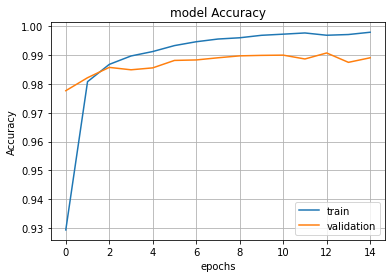

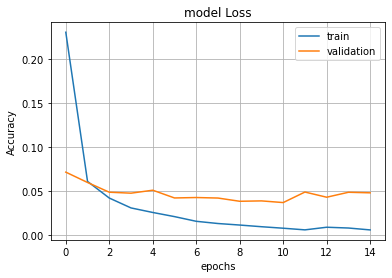

In [11]:
print("정확도 : ", LeNet.evaluate(x_test, y_test, verbose=0)[1]*100)

make_graph(history)

#### [6-1-2] LeNet-5 모델보다 얕은 cnn (keras 예제)

In [12]:
from tensorflow.keras.layers import Dropout

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 - 38s - loss: 0.2695 - accuracy: 0.9177 - val_loss: 0.0611 - val_accuracy: 0.9819
Epoch 2/15
48000/48000 - 39s - loss: 0.0909 - accuracy: 0.9727 - val_loss: 0.0461 - val_accuracy: 0.9868
Epoch 3/15
48000/48000 - 40s - loss: 0.0673 - accuracy: 0.9796 - val_loss: 0.0417 - val_accuracy: 0.9871
Epoch 4/15
48000/48000 - 41s - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0363 - val_accuracy: 0.9891
Epoch 5/15
48000/48000 - 41s - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0369 - val_accuracy: 0.9899
Epoch 6/15
48000/48000 - 42s - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0375 - val_accuracy: 0.9883
Epoch 7/15
48000/48000 - 44s - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0395 - val_accuracy: 0.9889
Epoch 8/15
48000/48000 - 44s - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 9/15
48000/48000 - 45s - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.0390 - val_accuracy: 0.9898
Epoch

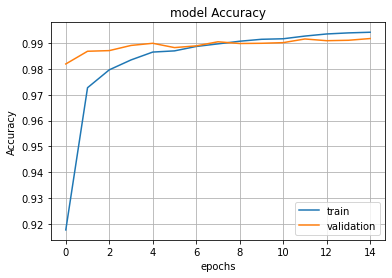

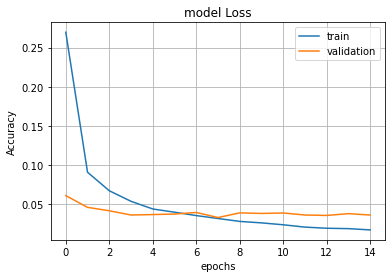

In [13]:
# cnn 모델 설계

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, padding="valid", activation='relu', strides=1, input_shape=(28, 28, 1)))
cnn.add(Conv2D(filters=64, kernel_size=3, padding="valid", activation='relu', strides=1))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=None))
cnn.add(Dropout(0.25))
# fully connected
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
# output layer
cnn.add(Dense(10, activation='softmax'))

# 학습 
cnn.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history = cnn.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2, verbose=2)

print("정확도 : ", cnn.evaluate(x_test, y_test, verbose=0)[1]*100)

make_graph(history)